NLP: **Natural Language Processing**: The discipline of computer science, AI and linguistics that is concered with the creation of computational models that process and understand natural language.

These Include:



*  making the computer understand the semantic grouping of words
*   text to speech
*   Language translation etc.

**Sentiment Analysis**: *It is the interpretation and classification of emotions* *(positive and negative) within text data using text data analysis*.
Sentiment Analysis allows organizations to identify public sentiment towards certain words or topics

### Importing Dependencies

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,recall_score,precision_score,classification_report,roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

import xgboost as xgb
# from xgboost.sklearn import XGBClassifier

from scipy.stats import boxcox

import nltk
from nltk.corpus import stopwords
from nltk import tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

from wordcloud import WordCloud

from joblib import dump, load
import pickle

import string
import re
import time

# pip install pandas-profiling
# from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
data = pd.read_csv("/content/drive/MyDrive/training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1")
data

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


**Understanding Data**

In [25]:
data.columns = ["Sentiment", "time", "date", "query", "username", "text"]
data.head()

,Sentiment,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [26]:
data_columns = ["Sentiment", "time", "date", "query", "username", "text"]

In [27]:
data[data_columns].isna().sum()

,0
Sentiment,0
time,0
date,0
query,0
username,0
text,0


**obs:** There are no null values in the dataset

In [28]:
y = data["Sentiment"].value_counts()
y

,count
Sentiment,
4,800000
0,799999


Obs: the dataset is balanced

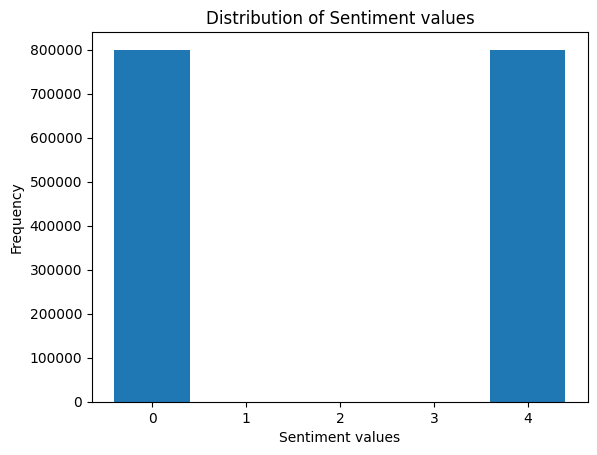

In [29]:
plt.bar(x=y.index, height=y)
plt.xlabel("Sentiment values")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment values")
plt.show()

###Data Preparation

In [30]:
#selecting the relevant columns in the final dataframe
data = data[["text", "Sentiment"]]
data

,text,Sentiment
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0
...,...,...
1599994,Just woke up. Having no school is the best fee...,4
1599995,TheWDB.com - Very cool to hear old Walt interv...,4
1599996,Are you ready for your MoJo Makeover? Ask me f...,4
1599997,Happy 38th Birthday to my boo of alll time!!! ...,4


In [31]:
# Coverting the ppositive sentiment value "4" to "1" in the target variable
data["Sentiment"] = data["Sentiment"].apply(lambda x: 1 if x == 4 else x)
data

,text,Sentiment
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0
...,...,...
1599994,Just woke up. Having no school is the best fee...,1
1599995,TheWDB.com - Very cool to hear old Walt interv...,1
1599996,Are you ready for your MoJo Makeover? Ask me f...,1
1599997,Happy 38th Birthday to my boo of alll time!!! ...,1


In [32]:
#checking the spread of values post change
data["Sentiment"].value_counts()

,count
Sentiment,
1,800000
0,799999


In [33]:
# Storing text and sentiment data in lists for further processing
text = list(data["text"])
sentiment = list(data["Sentiment"])

###Data Preprocessing

**Text Preprocessing** is an important step for **Natural Language Processing (NLP)** tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better.

**The Preprocessing steps taken are:**
1. **Lower Casing:** Each text is converted to lowercase.
2. **Replacing URLs:** Links starting with **"http" or "https" or "www"** are replaced by **"URL"**.
3. **Replacing Emojis:** Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. *(eg: ":)" to "EMOJIsmile")*
4. **Replacing Usernames:** Replace @Usernames with word **"USER"**. *(eg: "@Kaggle" to "USER")*
5. **Removing Non-Alphabets:** Replacing characters except Alphabets with a space.
6. **Removing Consecutive letters:** 3 or more consecutive letters are replaced by 2 letters. *(eg: "Heyyyy" to "Heyy", "Niceee" to "Nice")*
7. **Removing Short Words:** Words with length less than 2 are removed.
8. **Removing Stopwords:** Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. *(eg: "the", "he", "have")*
9. **Lemmatizing:** Lemmatization is the process of converting a word to its base form. *(e.g: “Great” to “Good”)*

In [34]:
# Defined a method with all preprocessing functions

def preprocess(textdata):

    # Defining dictionary containing all emojis with their meanings.
    emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
              ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
              ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
              ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
              '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
              '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
              ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

    stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
                 'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
                 'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
                 'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
                 'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
                 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
                 'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
                 'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
                 'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
                 's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
                 't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
                 'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
                 'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
                 'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
                 'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
                 "youve", 'your', 'yours', 'yourself', 'yourselves']


    processedText = []

    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    # alphaPattern      = "[^a-zA-Z0-9]"
    alphaPattern      = "[^a-zA-Z]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()

        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)

        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])

        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)

        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)

        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        #Removing punctuations if any left post removing all all non alphabets
        all_char_list = []
        all_char_list = [char for char in tweet if char not in string.punctuation]
        tweet = ''.join(all_char_list)

        # Removing all stopwords as per custom list defined above
        tweetwords = ''
        for word in tweet.split():
            if word not in (stopwordlist):
                if len(word)>1:
                    # Lemmatizing the word.
                    # text_pos = pos_tag(word_tokenize(word))
                    # word = lemma.lemmatize(text_pos[0][0],get_wordnet_pos_tag(text_pos[0][1]))
                    # word = wordLemm.lemmatize(word)
                    tweetwords += (word+' ')

        processedText.append(tweetwords)

    return processedText

In [35]:
t = time.time()
preprocessedtext = preprocess(text)
print("Text preprocessing Complete.")
print("Time taken: {}s".format(round(time.time()-t)))

Text preprocessing Complete.
Time taken: 99s


POS TAGGING: (Part-of-speech) is a popular NLP process which refers to categorizing words in a text(corpus) in correspondence with a particular part of speech, depending on the definition of the word and its context.

Lemmatization is a linguistic term that means grouping together words with the same root or lemma but with different inflections or derivatives of meaning so they can be analyzed as one item. The aim is to take away inflectional suffixes and prefixes to bring out the word's dictionary form.

In [68]:
import nltk

nltk.download('punkt')  # Required for tokenization
nltk.download('wordnet')  # Required for lemmatization
nltk.download('averaged_perceptron_tagger_eng')  # <-- THIS IS THE MISSING RESOURCE
nltk.download('omw-1.4')  # Optional, for extended lemmatizer support


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [69]:
import nltk
nltk.download('averaged_perceptron_tagger_eng', download_dir='/usr/local/nltk_data')
nltk.data.path.append('/usr/local/nltk_data')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/local/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [70]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

from nltk import pos_tag
from nltk.tokenize import word_tokenize

text = "This is a test sentence."
tokens = word_tokenize(text)
print(pos_tag(tokens))


[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('test', 'NN'), ('sentence', 'NN'), ('.', '.')]


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [71]:
#Defining a method to return the 2nd parameter for lemmatization that is POS tag.
def get_wordnet_pos_tag(tag):
    if tag.startswith("J"):
        return wordnet.ADJ
    if tag.startswith("V"):
        return wordnet.VERB
    if tag.startswith("N"):
        return wordnet.NOUN
    if tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [72]:
# Create a method to perform lemmatization with POS tags identified via a pos_tag method
def lemmatize_process(preprocessedtext):
    # Create Lemmatizer
    lemma = WordNetLemmatizer()

    finalprocessedtext = []
    for tweet in preprocessedtext:
        text_pos = pos_tag(word_tokenize(tweet))
        words = [x[0] for x in text_pos]
        pos = [x[1] for x in text_pos]
        tweet_lemma = " ".join([lemma.lemmatize(a,get_wordnet_pos_tag(b)) for a,b in zip(words,pos)])
        finalprocessedtext.append(tweet_lemma)
    return finalprocessedtext

In [73]:
t = time.time()
processedtext = lemmatize_process(preprocessedtext)
print("Lemmatization Complete.")
print("Time taken: {}s".format(round(time.time()-t)))

Lemmatization Complete.
Time taken: 1053s


###Data Analysis

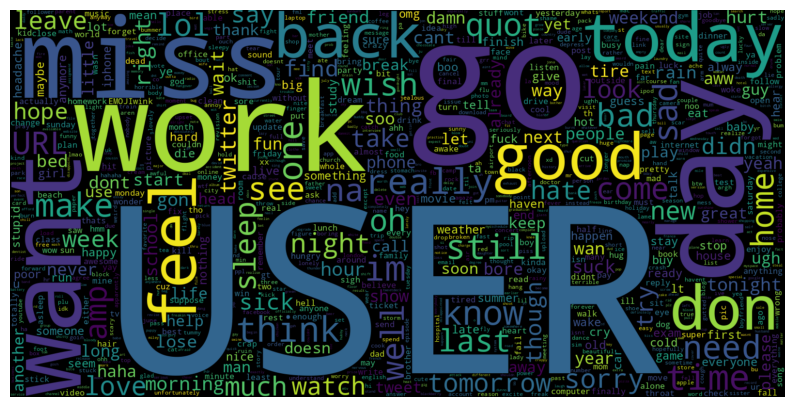

In [74]:
# Creating word cloud of negative tweets, where the words appearing larger are more frequent in nature across articles
# First 800000 tweets in the list are negative tweets

data_neg = processedtext[:800000]
all_negwords = ' '.join(data_neg)
wordcloud = WordCloud(max_words = 1000, width= 1600, height= 800,
                      collocations = False).generate(all_negwords)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

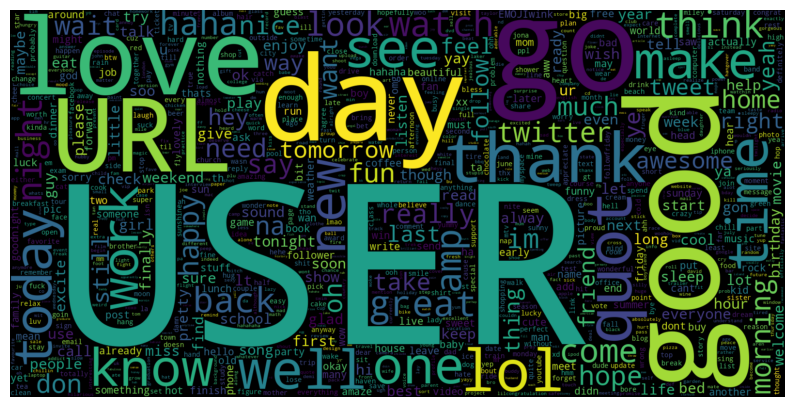

In [76]:
# Creating word cloud of positive tweets, where the words appearing larger are more frequent in nature acros articles
# Last 800000 tweets in the list are negative tweets

data_pos = processedtext[800000:]
all_poswords = ' '.join(data_pos)
wordcloud = WordCloud(max_words = 1000, width= 1600, height= 800,
                      collocations = False).generate(all_poswords)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [81]:
# Created a method using WhitespaceTokenizer and FreqDist to identify the most frequent set of words in the datset segregated
# by target variable

token_wspace = tokenize.WhitespaceTokenizer()

def mostFrequentWords(tweets,quantity):
    all_words = ' '.join(tweets)
    all_tokens = token_wspace.tokenize(all_words)
    freq_dist = nltk.FreqDist(all_tokens)
    df_frequency = pd.DataFrame({"Word":list(freq_dist.keys()), "Frequency":list(freq_dist.values())})
    df_frequency = df_frequency.nlargest(columns="Frequency", n=quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'green')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

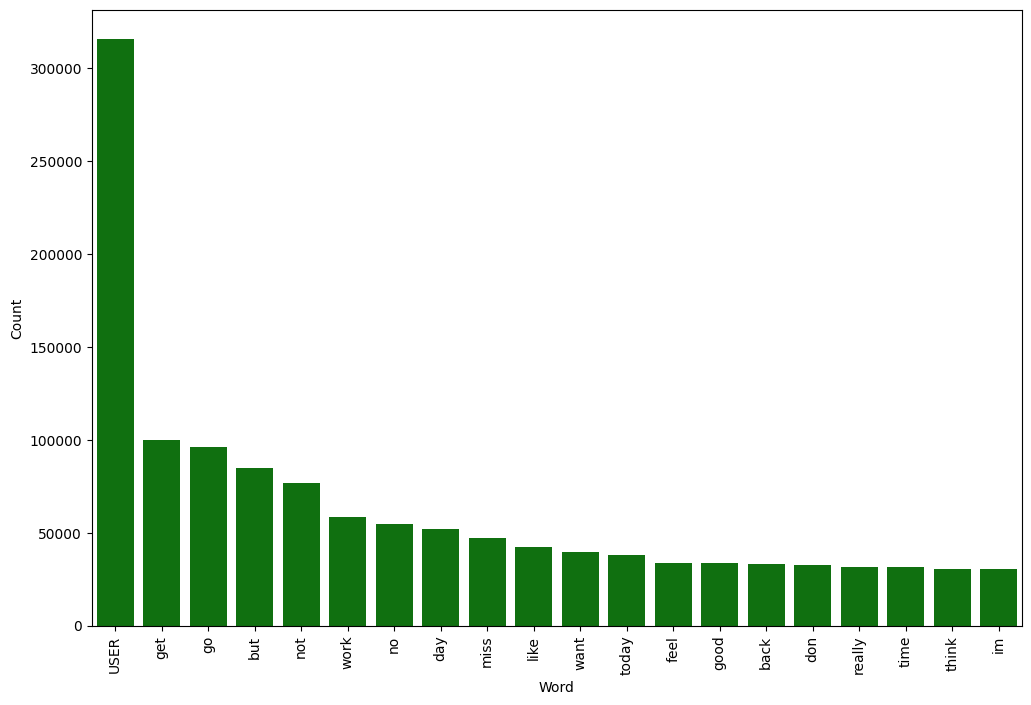

In [82]:
# for negative case: plotting the most frequent top 20 words
mostFrequentWords(processedtext[:800000],20)

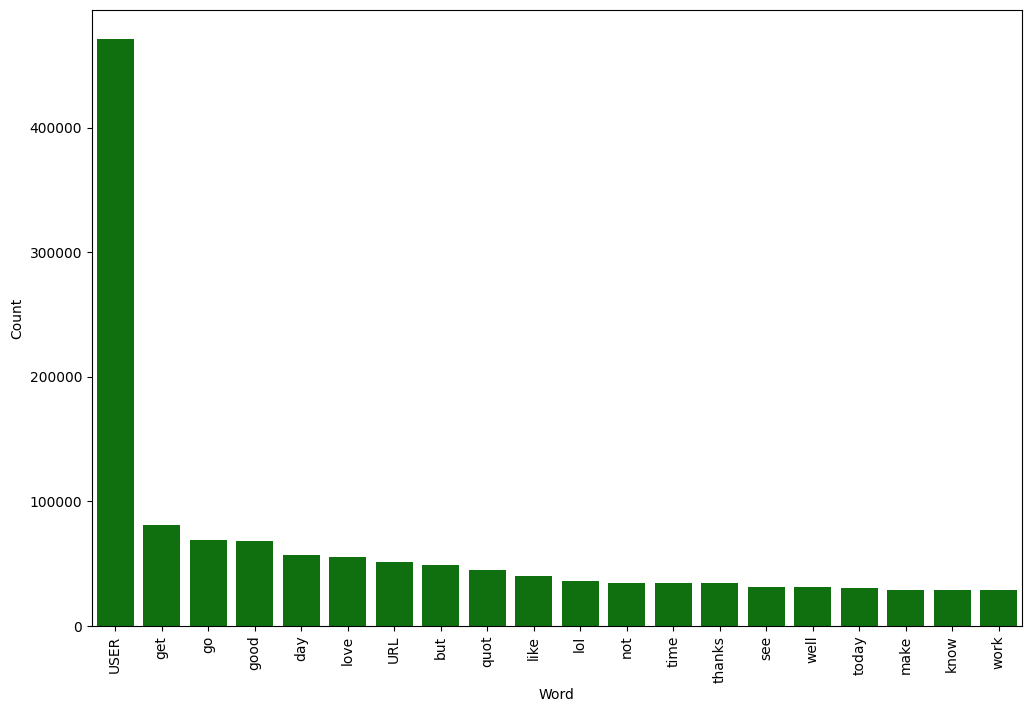

In [83]:
# for positive case: plotting the most frequent top 20 words
mostFrequentWords(processedtext[800000:],20)

###Data Preparation

**Splitting the Data**

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    processedtext, sentiment, test_size=0.2, random_state=42)
print("Data Split Completed!")

Data Split Completed!


**TF-IDF Vectoriser**

**TF: Term Frequency**

**IDF: Inverse Document Frequency**



*   **TF-IDF** indicates the importance of a word, in order to understand the document or dataset.
*   **TF-IDF Vectoriser** converts a collection of raw documents into a matrix of TD-IDF features. The Vectoriser is usually trained on only the train dataset.




In [85]:
# Fitting TF-IDF vectorizer on the train dataset
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print("TF-IDF Vectoriser fitted!")
print("Number of feature_words", len(vectoriser.get_feature_names_out()))

TF-IDF Vectoriser fitted!
Number of feature_words 500000


**Transforming the Dataset**

In [86]:
# Transforming the X_train and X_test dataset on the fitted model
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)
print("Data Transformed!")

Data Transformed!


###Classification Metrics

Confusion Matrix: A Confusion Matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.



*   True Positives => Observation is Positive, and the model classified it as positive.

*   False Negative => Observation is Positive, and the model classified it as negative.
*   False Positives => Observation is Negative, and the model classified it as positive.

*   True Negative => Observation is Positive, and the model classified it as negative.

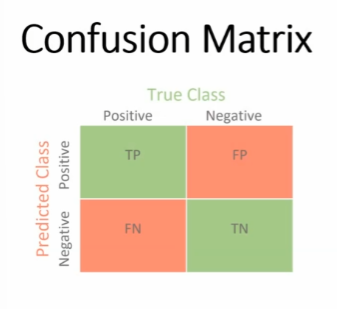

Classification  Report:

A classification Report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.


*   Precision tells us how many of the correctly predicted cases actually turned out to be positive.
*   Precision is given a: True Positives/(True Positives + False Positives)


*   Recall tells us how many of the actual positive cases we were able to predict correctly with our model
*   Recall is given as:  True Positives/(True Positives + False Negatives)


*   F1-Score is a harmonic mean of precision and recall, and so it gives combined idea about these two metrics. It is maximum when precision is equal to recall.







**AUC-ROC**

**“Area Under the Curve” (AUC) of “Receiver Operating Characteristic” (ROC)**.

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’.

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

### Creating and evaluating Models

In [87]:
# Creating a method which will take the model object and then predict on the test set and evaluate on Accuracy,
# Confusion Matrix and ROC Curve

def model_Evaluate(model):

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))


    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


    plt.title ("ROC Curve")
    #Area under Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()

    return y_pred

### <a name="p10-1">LinearSVC Model</a>

              precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           1       0.79      0.81      0.80    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



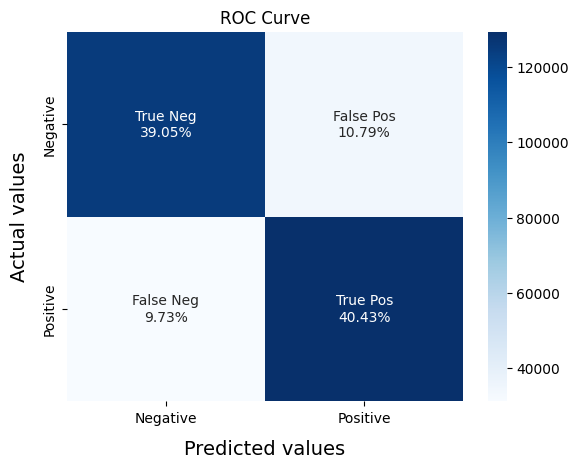

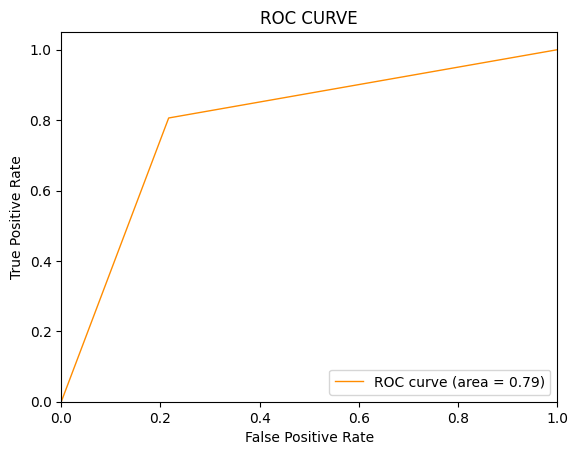

array([1, 0, 0, ..., 1, 0, 0])

In [88]:
# Created a Linear SVM model with default parameters and then evaluating the model

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

### <a name="p10-2">BernoulliNB Model</a>

              precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           1       0.78      0.80      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



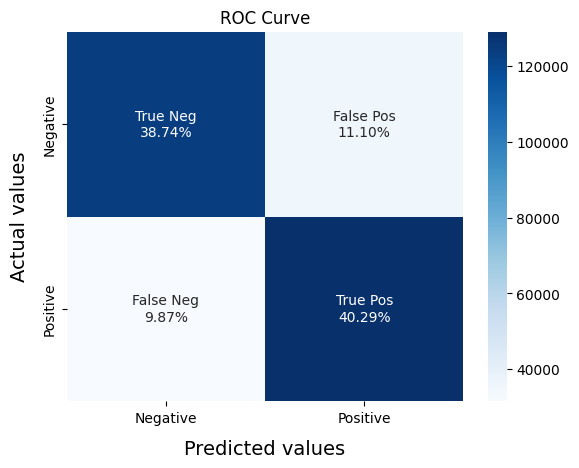

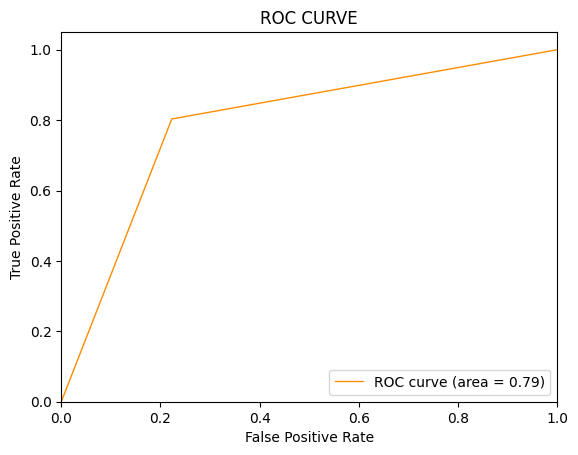

array([0, 0, 0, ..., 1, 0, 1])

In [89]:
# Created a Bernoulli Naive Bayes model with default parameters and then evaluating the model

BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

### <a name="p10-3">Logistic Regression Model</a>

              precision    recall  f1-score   support

           0       0.81      0.80      0.80    159494
           1       0.80      0.82      0.81    160506

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



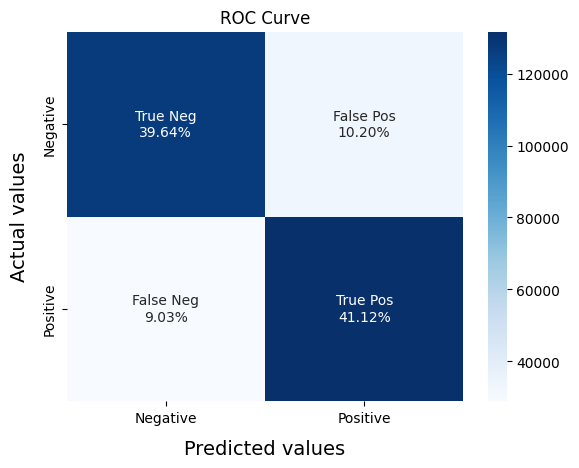

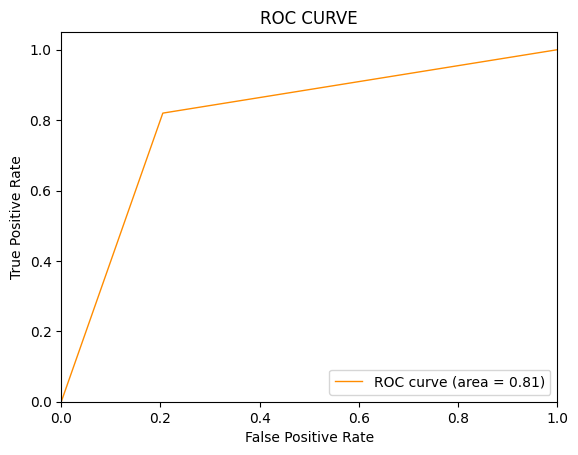

In [90]:
# Created a Logistic Regression model with regularization parameter and max iteration limit and then evaluating the model
LRmodel = LogisticRegression(C = 1, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
y_test_pred = model_Evaluate(LRmodel)

We can clearly see that the **Logistic Regression Model** performs better than the other models that we tried. It achieves nearly **81% accuracy** while classifying the sentiment of a tweet.

However it should also be noted that the **BernoulliNB Model** is the fastest to train and predict on. It also achieves **79% accuracy** while calssifying.

As we need the prediction probabilities hence not proceeding with SVM model

In [91]:
# Printing the positive and negative sentiment on the test data based on logistic regression model
print("Positive Sentiment Percentage : {}%".format(round(np.count_nonzero(y_test_pred == 1)/len(y_test_pred)*100,2)))

print("Negative Sentiment Percentage : {}%".format(round(np.count_nonzero(y_test_pred == 0)/len(y_test_pred)*100,2)))

Positive Sentiment Percentage : 51.33%
Negative Sentiment Percentage : 48.67%


**Saving the model**

We're using **PICKLE** to save **Vectoriser and Logistic Regression Model** for later use

In [93]:
import os
import pickle
from IPython import get_ipython

# Ensure the directory exists before attempting to write the file
output_dir = '../models/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

# Storing the vectorizer object and Logistic Regression object in pickle files for later use
file = open(os.path.join(output_dir, 'vectoriser.pickle'), 'wb')
pickle.dump(vectoriser, file)
file.close()

file = open(os.path.join(output_dir, 'Sentiment-LR.pickle'), 'wb')
pickle.dump(LRmodel, file)
file.close()

print("Vectorizer and Logistic Regression models saved successfully.")

Created directory: ../models/
Vectorizer and Logistic Regression models saved successfully.


**Using the Model**

In [97]:
# Created a method to load the models from pickle file
def load_models():

    # Load the vectoriser.
    file = open('../models/vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()

    # Load the LR Model.
    file = open('../models/Sentiment-LR.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()

    return vectoriser, LRmodel


# Created a method to perform tfidf vectorizer on unseen data and then using the model loaded from pickle file to predict
# whether positive or negative and also the probability along with it.
# Do note the unseen data should be passed to the model in a list
def predict(vectoriser, model, text):
    finaldata = []

    textdata = vectoriser.transform(lemmatize_process(preprocess(text)))
    sentiment = model.predict(textdata)

    # print(model.classes_)
    sentiment_prob = model.predict_proba(textdata)

    for index,tweet in enumerate(text):
        if sentiment[index] == 1:
            sentiment_probFinal = sentiment_prob[index][1]
        else:
            sentiment_probFinal = sentiment_prob[index][0]

        sentiment_probFinal2 = "{}%".format(round(sentiment_probFinal*100,2))
        finaldata.append((tweet, sentiment[index], sentiment_probFinal2))

    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(finaldata, columns = ['tweet','sentiment', 'Probability(Confidence Level)'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [98]:
# Text to classify should be in a list.
text = ["I hate twitter",
        "I do not like the movie",
        "Mr. Stark, I don't feel so good",
        "May the Force be with you.",
       "I read the book, the content is not good",
       "This is a new beginning for us"]

In [99]:
# Calling the load model method and then calling predict method by passing the tfidf vectorizer and model as parameter
# Finally printing the dataframe containing tweet, sentiment and the probability confidence.
vectoriser, LRmodel = load_models()
df = predict(vectoriser, LRmodel, text)
df

,tweet,sentiment,Probability(Confidence Level)
0,I hate twitter,Negative,93.28%
1,I do not like the movie,Negative,84.26%
2,"Mr. Stark, I don't feel so good",Negative,72.41%
3,May the Force be with you.,Positive,72.09%
4,"I read the book, the content is not good",Negative,69.84%
5,This is a new beginning for us,Positive,78.57%


**Using the Model -  Excel Upload**

the objective of the below analysis is to identify and priortize important tweets in alarming situation, say a storm like hurricane where the tweets(negative tweets) which needs attention by authorities are shown first.

In [102]:
# Importing the dataset
data = pd.read_csv("/testdata.csv", encoding = "ISO-8859-1")
data

,url,date,text
0,https://twitter.com/EcoLisa_/status/9022754290...,Mon Aug 28 21:03:20 2017,Here's how you can help victims of #HurricaneH...
1,https://twitter.com/RedefiningDecor/status/903...,Thu Aug 31 15:43:15 2017,RT @tripgabriel: This is a very gripping graph...
2,https://twitter.com/BestofY00/status/903281998...,Thu Aug 31 15:43:05 2017,RT @tripgabriel: This is a very gripping graph...
3,https://twitter.com/Deborah9111966/status/9032...,Thu Aug 31 15:43:01 2017,RT @tripgabriel: This is a very gripping graph...
4,https://twitter.com/kirkbocchi/status/90328194...,Thu Aug 31 15:42:53 2017,RT @tripgabriel: This is a very gripping graph...
...,...,...,...
15423,https://twitter.com/IrishMaga/status/903307371...,Thu Aug 31 17:23:54 2017,Hero saves 50 in Texas town of Port Arthur aft...
15424,https://twitter.com/giovanna_jaga/status/90330...,Thu Aug 31 17:23:51 2017,Mexican bakers in Texas were trapped inside fo...
15425,https://twitter.com/BreenMarissa/status/903307...,Thu Aug 31 17:23:44 2017,RT @hduke27: i really wanna go to texas and he...
15426,https://twitter.com/basepaella26/status/903307...,Thu Aug 31 17:23:42 2017,Hurricane Harvey-related death toll rises to 3...


In [101]:
data.shape

(15428, 3)

In [103]:
text = list(data['text'])

In [104]:
# Created a method to perform tfidf vectorizer on unseen data and then using the model loaded from pickle file to predict
# whether positive or negative and also the probability along with it.
# Do note the unseen data should be passed to the model in a list
def predict_Excel(vectoriser, model, text):
    finaldata = []

    textdata = vectoriser.transform(lemmatize_process(preprocess(text)))
    sentiment = model.predict(textdata)

    # print(model.classes_)
    sentiment_prob = model.predict_proba(textdata)

    for index,tweet in enumerate(text):
        sentiment_probFinal = sentiment_prob[index][0]

        sentiment_probFinal2 = "{}%".format(round(sentiment_probFinal*100,2))
        finaldata.append((tweet, sentiment[index], sentiment_probFinal2))

    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(finaldata, columns = ['tweet','sentiment', 'Severity'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [105]:
vectoriser, LRmodel = load_models()
df = predict_Excel(vectoriser, LRmodel, text)

In [106]:
df.sort_values(by=['Severity'],ascending=False,inplace=True)
df

,tweet,sentiment,Severity
18,This is so sad. Thousands Cried for Help as Ho...,Negative,99.64%
6888,When the storm comes it affects us all...no ex...,Negative,99.62%
2009,This breaks my heart. I wish I could do more t...,Negative,99.46%
9121,It's Sad That Some Hispanics In Houston Have T...,Negative,99.44%
9625,via @NYTimes #TexasStrong so sad. https://t.c...,Negative,99.28%
...,...,...,...
9581,RT @PRyan: Thank you @JJWatt. You make Wiscons...,Positive,0.7%
9606,RT @PRyan: Thank you @JJWatt. You make Wiscons...,Positive,0.7%
9650,RT @PRyan: Thank you @JJWatt. You make Wiscons...,Positive,0.7%
9677,RT @PRyan: Thank you @JJWatt. You make Wiscons...,Positive,0.7%


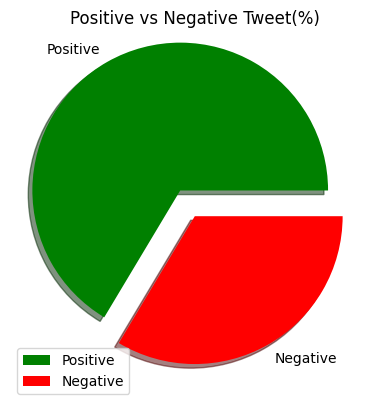

In [107]:
positive = round(np.count_nonzero(df['sentiment'] == "Positive")/len(df['sentiment'])*100,2)
negative = round(np.count_nonzero(df['sentiment'] == "Negative")/len(df['sentiment'])*100,2)

labels = ['Positive','Negative']
values = np.array([positive,negative])
myexplode = [0.2, 0]
mycolors = ["green", "red"]

fig,ax = plt.subplots()
ax.pie(values, labels = labels, explode = myexplode, shadow = True, colors = mycolors)
ax.legend()
ax.set_title("Positive vs Negative Tweet(%)")
fig.show()

In [109]:
filename = 'Final.csv'
df.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: Final.csv
